In [1]:
import numpy as np
from   matplotlib import pyplot as plt


In [2]:
def model(X_v, y_v):

    C = np.matmul(X_v.T, X_v)
    x_mean = np.mean(X_v, axis=0)


    if type(C) is np.float64:
        inv_C = 1/C
        w     = inv_C * np.matmul(X_v.T, y)
        R2i   = w * np.matmul(X_v.T, X_v) * w / len(y_v)

    else:
        inv_C = np.linalg.inv(C)
        w     = np.matmul(np.matmul(inv_C, X_v.T), y)
        R2i   = np.matmul(np.diag(w.T), np.matmul(np.matmul(X_v.T, X_v), w)) / len(y_v)

    return w, R2i



In [3]:
samples = 1000

def covariance(r, a): 
    b = np.sqrt(r**2 - a**2)
    return np.array([
            [1, b, a],
            [b, 1, 0],
            [a, 0, 1]])

phi2_plot = []

radius = 0.95

for alpha in np.arange(0.0, radius, 0.01):
    phi = []
    for i in range(100):
        data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance(radius, alpha), size=samples, check_valid='warn')
        
        X = data[:,:2]
        y = data[:, 2]
       
        (w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)
        phi_1 = 0.5 * (R1 + sum(Rn) - R2)
        phi_2 = 0.5 * (R2 + sum(Rn) - R1)
        phi.append([alpha, phi_1, phi_2])

    
    phi_mean = np.mean(np.array(phi), axis=0)
    phi2_plot.append(phi_mean)
    
    

phi2_plot = np.array(phi2_plot)



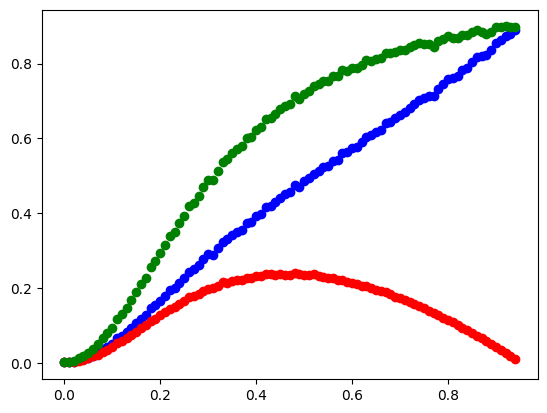

In [4]:
plt.scatter(phi2_plot[:,0], phi2_plot[:,1], color='blue' )
plt.scatter(phi2_plot[:,0], phi2_plot[:,2], color='red' )
plt.scatter(phi2_plot[:,0], (phi2_plot[:,1] + phi2_plot[:,2]), color='green' )


In [5]:
 phi2_plot[:,1]

array([0.0008943 , 0.00139237, 0.003393  , 0.0062886 , 0.01047022,
       0.01376705, 0.01942427, 0.02697925, 0.03630066, 0.04324304,
       0.05115029, 0.06501468, 0.07272926, 0.08212691, 0.09373302,
       0.10522968, 0.11836052, 0.12803268, 0.14520459, 0.15405861,
       0.16612178, 0.17987521, 0.19536411, 0.19876617, 0.21413943,
       0.227011  , 0.24354128, 0.25073409, 0.26107086, 0.27862012,
       0.29077367, 0.28918354, 0.30716707, 0.32212372, 0.33026483,
       0.34248675, 0.34956949, 0.35612315, 0.37394263, 0.3752011 ,
       0.39153866, 0.39892864, 0.4156473 , 0.41866669, 0.42892541,
       0.44102128, 0.45200324, 0.45709889, 0.4748768 , 0.47016344,
       0.48499495, 0.49300778, 0.50443685, 0.51387628, 0.52297483,
       0.52752604, 0.5404468 , 0.54350279, 0.55972032, 0.5644445 ,
       0.57475114, 0.57696541, 0.59094934, 0.60403041, 0.60878408,
       0.61705117, 0.62259955, 0.64074443, 0.64446758, 0.65485054,
       0.66249486, 0.66967735, 0.68075899, 0.69171465, 0.70312

In [25]:
X = data[:,:2]
y = data[:, 2]

(w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)

In [47]:
R2

1.1587293702357554e-05